# Lake Malome Study Notebook

In [1]:
import ee
# Initialize the Earth Engine module.
ee.Initialize()

In [2]:
from util import *

## Figure 2

In [3]:
startDate1 = '2019-05-08'
endDate1 = '2019-05-12'

startDate2 = '2019-06-22'
endDate2 = '2019-06-24'

startDate3 = '2019-07-10'
endDate3 = '2019-07-20'

startDate4 = '2019-08-16'
endDate4 = '2019-08-21'

startDate5 = '2019-09-10'
endDate5 = '2019-09-12'

startDate6 = '2019-10-15'
endDate6 = '2019-10-17'

### Calibration

In [4]:
# Sampling locations in June, 2019
west_jun = ee.Geometry.Point([35.202406, -14.667367])
outlet_jun = ee.Geometry.Point([35.251639, -14.748801])
middle_jun = ee.Geometry.Point([35.248367, -14.628858])
inlet_jun = ee.Geometry.Point([35.257927, -14.538845])
east_jun = ee.Geometry.Point([35.31461, -14.631364])

# Sampling locations in September, 2019
west_sep = ee.Geometry.Point([35.202406, -14.667367])
outlet_sep = ee.Geometry.Point([35.251639, -14.748801])
middle_sep = ee.Geometry.Point([35.248367, -14.628858])
inlet_sep = ee.Geometry.Point([35.257927, -14.538845])
east_sep = ee.Geometry.Point([35.31461, -14.631364])

In [5]:
withChla_w6 = mean_image_S2(west_jun, startDate2, endDate2).map(addNDCI_S2).select('NDCI')
withChla_o6 = mean_image_S2(outlet_jun, startDate2, endDate2).map(addNDCI_S2).select('NDCI')
withChla_m6 = mean_image_S2(middle_jun, startDate2, endDate2).map(addNDCI_S2).select('NDCI')
withChla_i6 = mean_image_S2(inlet_jun, startDate2, endDate2).map(addNDCI_S2).select('NDCI')
withChla_e6 = mean_image_S2(east_jun, startDate2, endDate2).map(addNDCI_S2).select('NDCI')

withChla_w9 = mean_image_S2(west_sep, startDate5, endDate5).map(addNDCI_S2).select('NDCI')
withChla_o9 = mean_image_S2(outlet_sep, startDate5, endDate5).map(addNDCI_S2).select('NDCI')
withChla_m9 = mean_image_S2(middle_sep, startDate5, endDate5).map(addNDCI_S2).select('NDCI')
withChla_i9 = mean_image_S2(inlet_sep, startDate5, endDate5).map(addNDCI_S2).select('NDCI')
withChla_e9 = mean_image_S2(east_sep, startDate5, endDate5).map(addNDCI_S2).select('NDCI')

In [6]:
bounds_west_jun = west_jun.buffer(300) 
bounds_outlet_jun = outlet_jun.buffer(300) 
bounds_middle_jun =  middle_jun.buffer(300) 
bounds_inlet_jun = inlet_jun.buffer(300) 
bounds_east_jun = east_jun.buffer(300) 

bounds_west_sep = west_sep.buffer(300) 
bounds_outlet_sep = outlet_sep.buffer(300) 
bounds_middle_sep = middle_sep.buffer(300) 
bounds_inlet_sep = inlet_sep.buffer(300) 
bounds_east_sep = east_sep.buffer(300) 

In [7]:
chla_df_w6 = dataframe_prod(withChla_w6, bounds_west_jun, 'NDCI')
chla_df_o6 = dataframe_prod(withChla_o6, bounds_outlet_jun, 'NDCI')
chla_df_m6 = dataframe_prod(withChla_m6, bounds_middle_jun, 'NDCI')
chla_df_i6 = dataframe_prod(withChla_i6, bounds_inlet_jun, 'NDCI')
chla_df_e6 = dataframe_prod(withChla_e6, bounds_east_jun, 'NDCI')

chla_df_w9 = dataframe_prod(withChla_w9, bounds_west_sep, 'NDCI') 
chla_df_o9 = dataframe_prod(withChla_o9, bounds_outlet_sep, 'NDCI') 
chla_df_m9 = dataframe_prod(withChla_m9, bounds_middle_sep, 'NDCI') 
chla_df_i9 = dataframe_prod(withChla_i9, bounds_inlet_sep, 'NDCI') 
chla_df_e9 = dataframe_prod(withChla_e9, bounds_east_sep, 'NDCI')

In [8]:
S_NDCI = np.concatenate((chla_df_w6['NDCI'].values,\
                         chla_df_o6['NDCI'].values,\
                         chla_df_m6['NDCI'].values,\
                         np.array([chla_df_i6['NDCI'].values.mean()]),\
                         chla_df_e6['NDCI'].values,\
                         chla_df_w9['NDCI'].values,\
                         chla_df_o9['NDCI'].values,\
                         chla_df_m9['NDCI'].values,\
                         np.array([chla_df_i9['NDCI'].values.mean()]),\
                         chla_df_e9['NDCI'].values\
                        ), axis=0) 

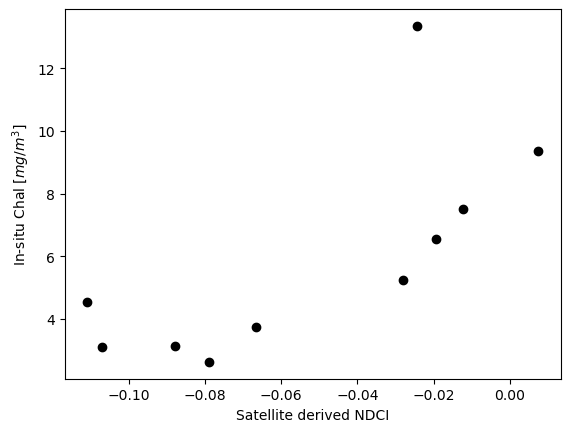

In [9]:
# In-situ data
chla_jun = np.array([3.1128, 4.5416, 3.7401, 3.1390, 2.6231])
chla_sep = np.array([13.3576, 6.5588, 5.2463, 9.3652, 7.5128])

chla_insitu =np.concatenate((chla_jun, chla_sep), axis=0)

plt.xlabel('Satellite derived NDCI')
plt.ylabel('In-situ Chal [$mg/m^3$]')
plt.scatter(S_NDCI, chla_insitu, color='k');

In [10]:
def NDCI_algorithm(x):
    return 9.547 + 104.809*x + 431.976*x**2

In [11]:
NDCI_v = np.vectorize(NDCI_algorithm)
Yhat = NDCI_v(S_NDCI)
Y = chla_insitu

d1 = Y - Yhat
d2 = Y - Y.mean()
r2 = 1-d1.dot(d1)/d2.dot(d2)

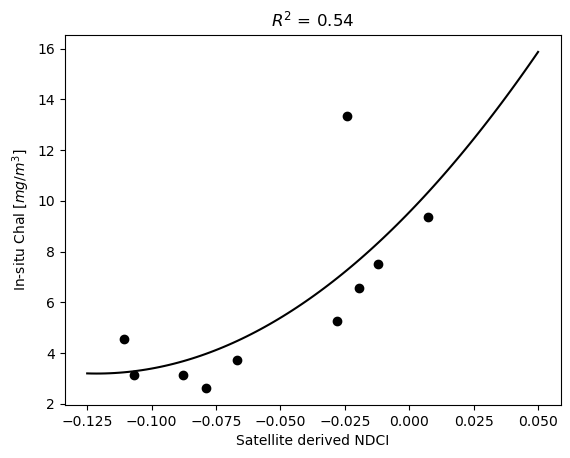

In [12]:
p = np.poly1d(np.polyfit(S_NDCI, chla_insitu,2))
t = np.linspace(-0.125, 0.05, 100)
plt.xlabel('Satellite derived NDCI')
plt.ylabel('In-situ Chal [$mg/m^3$]')
plt.title(f'$R^2$ = {round(r2, 2)}')
plt.plot(S_NDCI, chla_insitu, 'o', t, p(t), '-', color='k');

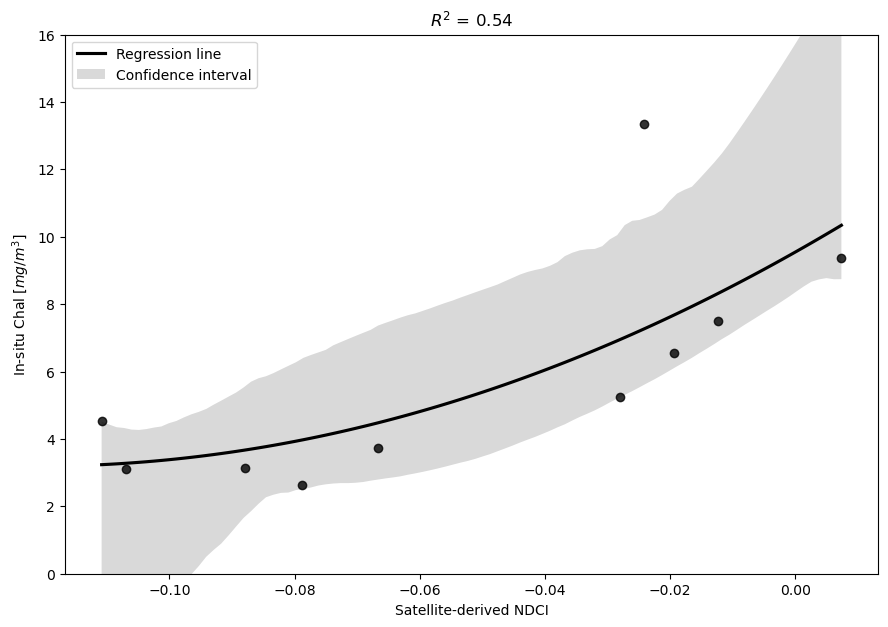

In [13]:
fig, ax = plt.subplots(figsize=(10.5,7))
ax = sns.regplot(x=S_NDCI, y=chla_insitu, ci=95, order=2, color='k', line_kws={'label': 'Regression line'})
ax.set_ylim([0,16])
ax.set_xlabel('Satellite-derived NDCI')
ax.set_ylabel('In-situ Chal [$mg/m^3$]')
ax.set_title(f'$R^2$ = {round(r2, 2)}')
ax.collections[1].set_label('Confidence interval')
ax.legend(loc='upper left');

### Validation

In [14]:
# Sampling locations in May, 2019
west_may = ee.Geometry.Point([35.202981, -14.639683])
outlet_may = ee.Geometry.Point([35.264812, -14.724981])
middle_may = ee.Geometry.Point([35.238484, -14.618457])
inlet_may = ee.Geometry.Point([35.236233, -14.53507])
east_may = ee.Geometry.Point([35.300301, -14.60977])

# Sampling locations in July, 2019
west_jul = ee.Geometry.Point([35.201257, -14.681778])
outlet_jul = ee.Geometry.Point([35.231031, -14.746615])
middle_jul = ee.Geometry.Point([35.239606, -14.628442])
inlet_jul = ee.Geometry.Point([35.259763, -14.552618])
east_jul = ee.Geometry.Point([35.323783, -14.641138])

# Sampling locations in August, 2019
west_aug = ee.Geometry.Point([35.202981, -14.639683])
outlet_aug = ee.Geometry.Point([35.264812, -14.724981])
middle_aug = ee.Geometry.Point([35.238484, -14.618457])
inlet_aug = ee.Geometry.Point([35.236233, -14.53507])
east_aug = ee.Geometry.Point([35.300301, -14.60977])

# Sampling locations in October, 2019
west_oct = ee.Geometry.Point([35.201257, -14.681778])
outlet_oct = ee.Geometry.Point([35.231031, -14.746615])
middle_oct = ee.Geometry.Point([35.239606, -14.628442])
inlet_oct = ee.Geometry.Point([35.259763, -14.552618])
east_oct = ee.Geometry.Point([35.323783, -14.641138])

In [15]:
withChla_w5 = mean_image_S2(west_may, startDate1, endDate1).map(addNDCI_S2).select('NDCI')
withChla_o5 = mean_image_S2(outlet_may, startDate1, endDate1).map(addNDCI_S2).select('NDCI')
withChla_m5 = mean_image_S2(middle_may, startDate1, endDate1).map(addNDCI_S2).select('NDCI')
withChla_i5 = mean_image_S2(inlet_may, startDate1, endDate1).map(addNDCI_S2).select('NDCI')
withChla_e5 = mean_image_S2(east_may, startDate1, endDate1).map(addNDCI_S2).select('NDCI')

withChla_w7 = mean_image_S2(west_jul, startDate3, endDate3).map(addNDCI_S2).select('NDCI')
withChla_o7 = mean_image_S2(outlet_jul, startDate3, endDate3).map(addNDCI_S2).select('NDCI')
withChla_m7 = mean_image_S2(middle_jul, startDate3, endDate3).map(addNDCI_S2).select('NDCI')
withChla_i7 = mean_image_S2(inlet_jul, startDate3, endDate3).map(addNDCI_S2).select('NDCI')

withChla_w8 = mean_image_S2(west_aug, startDate4, endDate4).map(addNDCI_S2).select('NDCI')
withChla_o8 = mean_image_S2(outlet_aug, startDate4, endDate4).map(addNDCI_S2).select('NDCI')
withChla_m8 = mean_image_S2(middle_aug, startDate4, endDate4).map(addNDCI_S2).select('NDCI')
withChla_i8 = mean_image_S2(inlet_aug, startDate4, endDate4).map(addNDCI_S2).select('NDCI')
withChla_e8 = mean_image_S2(east_aug, startDate4, endDate4).map(addNDCI_S2).select('NDCI')

withChla_w10 = mean_image_S2(west_oct, startDate6, endDate6).map(addNDCI_S2).select('NDCI')
withChla_o10 = mean_image_S2(outlet_oct, startDate6, endDate6).map(addNDCI_S2).select('NDCI')
withChla_m10 = mean_image_S2(middle_oct, startDate6, endDate6).map(addNDCI_S2).select('NDCI')
withChla_i10 = mean_image_S2(inlet_oct, startDate6, endDate6).map(addNDCI_S2).select('NDCI')
withChla_e10 = mean_image_S2(east_oct, startDate6, endDate6).map(addNDCI_S2).select('NDCI')

In [16]:
bounds_west_may = west_may.buffer(300) 
bounds_outlet_may = outlet_may.buffer(300) 
bounds_middle_may =  middle_may.buffer(300) 
bounds_inlet_may = inlet_may.buffer(300) 
bounds_east_may = east_may.buffer(300) 
 
bounds_west_jul = west_jul.buffer(300) 
bounds_outlet_jul = outlet_jul.buffer(300) 
bounds_middle_jul = middle_jul.buffer(300) 
bounds_inlet_jul = inlet_jul.buffer(300)  
bounds_east_jul = east_jul.buffer(300) 

bounds_west_aug = west_aug.buffer(300) 
bounds_outlet_aug = outlet_aug.buffer(300) 
bounds_middle_aug = middle_aug.buffer(300) 
bounds_inlet_aug = inlet_aug.buffer(300)  
bounds_east_aug = east_aug.buffer(300) 
 
bounds_west_oct = west_oct.buffer(300) 
bounds_outlet_oct = outlet_oct.buffer(300) 
bounds_middle_oct = middle_oct.buffer(300) 
bounds_inlet_oct = inlet_oct.buffer(300) 
bounds_east_oct = east_oct.buffer(300)

In [17]:
chla_df_w5 = dataframe_prod(withChla_w5, bounds_west_may, 'NDCI')
chla_df_o5 = dataframe_prod(withChla_o5, bounds_outlet_may, 'NDCI')
chla_df_m5 = dataframe_prod(withChla_m5, bounds_middle_may, 'NDCI')
chla_df_i5 = dataframe_prod(withChla_i5, bounds_inlet_may, 'NDCI')
chla_df_e5 = dataframe_prod(withChla_e5, bounds_east_may, 'NDCI')

chla_df_w7 = dataframe_prod(withChla_w7, bounds_west_jul, 'NDCI')
chla_df_o7 = dataframe_prod(withChla_o7, bounds_outlet_jul, 'NDCI')
chla_df_m7 = dataframe_prod(withChla_m7, bounds_middle_jul, 'NDCI')
chla_df_i7 = dataframe_prod(withChla_i7, bounds_inlet_jul, 'NDCI')

chla_df_w8 = dataframe_prod(withChla_w8, bounds_west_aug, 'NDCI')
chla_df_o8 = dataframe_prod(withChla_o8, bounds_outlet_aug, 'NDCI')
chla_df_m8 = dataframe_prod(withChla_m8, bounds_middle_aug, 'NDCI')
chla_df_i8 = dataframe_prod(withChla_i8, bounds_inlet_aug, 'NDCI')
chla_df_e8 = dataframe_prod(withChla_e8, bounds_east_aug, 'NDCI')

chla_df_w10 = dataframe_prod(withChla_w10, bounds_west_oct, 'NDCI') 
chla_df_o10 = dataframe_prod(withChla_o10, bounds_outlet_oct, 'NDCI') 
chla_df_m10 = dataframe_prod(withChla_m10, bounds_middle_oct, 'NDCI') 
chla_df_i10 = dataframe_prod(withChla_i10, bounds_inlet_oct, 'NDCI') 
chla_df_e10 = dataframe_prod(withChla_e10, bounds_east_oct, 'NDCI') 

In [18]:
S_NDCI_val = np.concatenate((chla_df_w5['NDCI'].values,\
                             chla_df_o5['NDCI'].values,\
                             chla_df_m5['NDCI'].values,\
                             np.array([chla_df_i5['NDCI'].values.mean()]),\
                             chla_df_e5['NDCI'].values,\
                             chla_df_w7['NDCI'].values,\
                             chla_df_o7['NDCI'].values,\
                             chla_df_m7['NDCI'].values,\
                             chla_df_i7['NDCI'].values,\
                             chla_df_w8['NDCI'].values,\
                             chla_df_o8['NDCI'].values,\
                             chla_df_m8['NDCI'].values,\
                             np.array([chla_df_i8['NDCI'].values.mean()]),\
                             chla_df_e8['NDCI'].values,\
                             chla_df_w10['NDCI'].values,\
                             chla_df_o10['NDCI'].values,\
                             chla_df_m10['NDCI'].values,\
                             chla_df_i10['NDCI'].values,\
                             chla_df_e10['NDCI'].values\
                        ), axis=0) 

In [19]:
# In-situ data
chla_may = np.array([3.9182, 3.6110, 2.0985, 2.0985, 3.2866])
chla_jul = np.array([3.2195, 4.6712, 3.4762, 4.2744])
chla_aug = np.array([11.1313, 6.2017, 8.9199, 3.1478, 8.7450])
chla_oct = np.array([12.2135, 9.4616, 4.5621, 13.3576, 6.7654])

chla_insitu_val =np.concatenate((chla_may, chla_jul, chla_aug, chla_oct), axis=0)

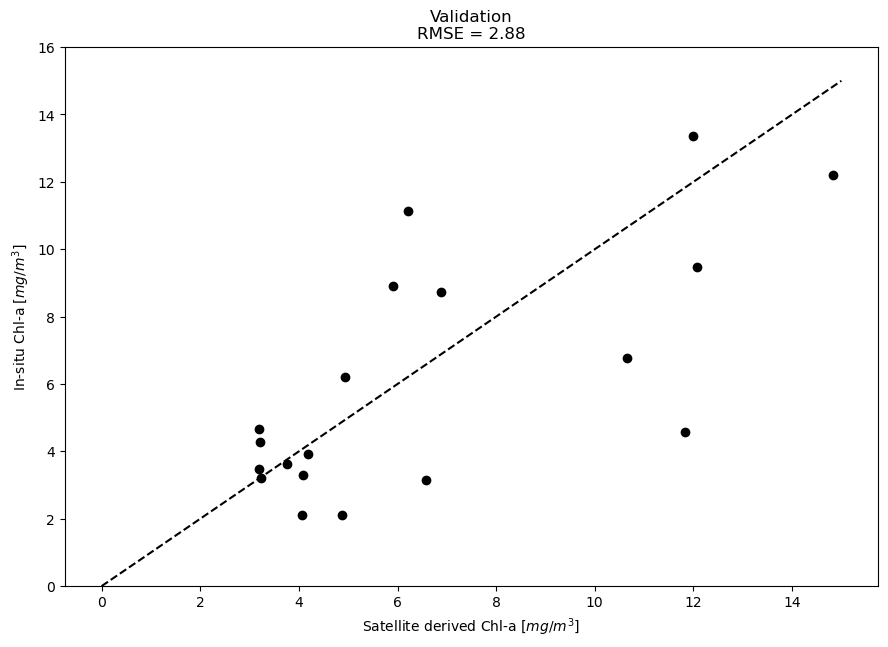

In [20]:
X_sat = NDCI_v(S_NDCI_val)
Y_insitu = chla_insitu_val
rmse = np.sqrt(np.mean((X_sat[1:] - Y_insitu[1:])**2))

fig = plt.figure(figsize=(10.5,7))
plt.xlabel('Satellite derived Chl-a [$mg/m^3$]')
plt.ylabel('In-situ Chl-a [$mg/m^3$]')
plt.title(f'Validation\nRMSE = {round(rmse, 2)}')
plt.scatter(X_sat[:], Y_insitu[:], color='k')
plt.ylim([0,16])

x_vals = np.linspace(0,15,100)
y_vals = x_vals
plt.plot(x_vals, y_vals, 'k--');

In [21]:
plt.rcParams.update({'font.size': 22})
_, axs = plt.subplots(1, 2, figsize=(20, 10), edgecolor='black', constrained_layout=True, dpi=600)

ax= axs[0]
sns.regplot(ax=ax, x=S_NDCI, y=chla_insitu, ci=95, order=2, color='k', scatter_kws={'s':150}, line_kws={'label': 'Regression line'})
# ax.set_ylim([0,16])
ax.set_xlabel('Satellite-derived NDCI')
ax.set_ylabel('Measured Chl-a [$mg/m^3$]')
# ax.set_title(f'$R^2$ = {round(r2, 2)}')
ax.set_title('(a) Calibration')
ax.collections[1].set_label('Confidence interval')
ax.legend(loc='upper left')

ax = axs[1]
ax.set_xlabel('Predicted Chl-a [$mg/m^3$]')
ax.set_ylabel('Measured Chl-a [$mg/m^3$]')
# ax.set_title(f'Validation\nRMSE = {round(rmse, 2)}')
ax.set_title('(b) Validation')
ax.scatter(X_sat[:], Y_insitu[:], color='k', s=150)
ax.axhline(alpha=0.5, c='k')
ax.axvline(alpha=0.5, c='k')

x_vals = np.linspace(-0.1,16,100)
y_vals = x_vals
plt.plot(x_vals, y_vals, 'k--');
# plt.savefig('./figure2.png')

## Figure 3

In [22]:
startDate = '2019-05-01'
endDate = '2019-05-30'

In [23]:
S2_BANDS = ee.List(['B12', 'B11', 'B8', 'B3', 'B4', 'B5', 'B2', 'QA60']) 
S2_NAMES = ee.List(['swir1', 'swir2', 'nir', 'green', 'red', 'red2', 'blue', 'QA60'])

In [24]:
geom = ee.Geometry.Polygon(
        [[[35.19496429044744, -14.647115511359019],
          [35.19496429044744, -14.661730297242592],
          [35.205263973064625, -14.661730297242592],
          [35.205263973064625, -14.647115511359019]]])

In [25]:
Sen2ImageCollection = ee.ImageCollection('COPERNICUS/S2_SR')\
.filterBounds(geom)\
.filterDate(startDate, endDate)\
.filterMetadata('CLOUDY_PIXEL_PERCENTAGE', 'less_than', 20)\
.select(S2_BANDS)\
.map(cloudMasking_S2_otsu)

In [26]:
bounds = ee.Geometry.Polygon(
[
    [
        [35.05117393493859,-14.567476706515635],
        [34.98249502357456,-14.56747684216918],
        [34.98249563853923,-14.712498859903812],
        [35.05117379139305,-14.71249872295211],
        [35.05117405325887,-14.712498726424245],
        [35.05117407847995,-14.71249872295211],
        [35.12078247974755,-14.71249872295211],
        [35.12078274161338,-14.712498726424252],
        [35.12078276683445,-14.71249872295211],
        [35.19039116810203,-14.712498722952114],
        [35.19039142996786,-14.712498726424249],
        [35.19039145518894,-14.71249872295211],
        [35.25999985645652,-14.71249872295211],
        [35.260000118322345,-14.712498726424249],
        [35.26000014354343,-14.71249872295211],
        [35.329608544811016,-14.71249872295211],
        [35.329608806676845,-14.712498726424249],
        [35.32960883189792,-14.712498722952114],
        [35.3992172331655,-14.71249872295211],
        [35.39921749503134,-14.712498726424249],
        [35.39921752025242,-14.71249872295211],
        [35.46882592151999,-14.71249872295211],
        [35.468826183385815,-14.712498726424252],
        [35.468826208606906,-14.71249872295211],
        [35.537504361460726,-14.712498859903809],
        [35.537504976425396,-14.56747684216918],
        [35.46882606506404,-14.56747670651563],
        [35.39921737670757,-14.567476706515633],
        [35.32960868835529,-14.567476706515635],
        [35.2600000000008,-14.567476706515635],
        [35.19039131164532,-14.567476706515633],
        [35.120782623289905,-14.56747670651563],
        [35.05117393493859,-14.567476706515635]
    ]
])

In [27]:
w = 0.15
h = 0.2
lon, lat = 35.26, -14.64

region = [lon + w, lat - h, lon - w, lat + h]

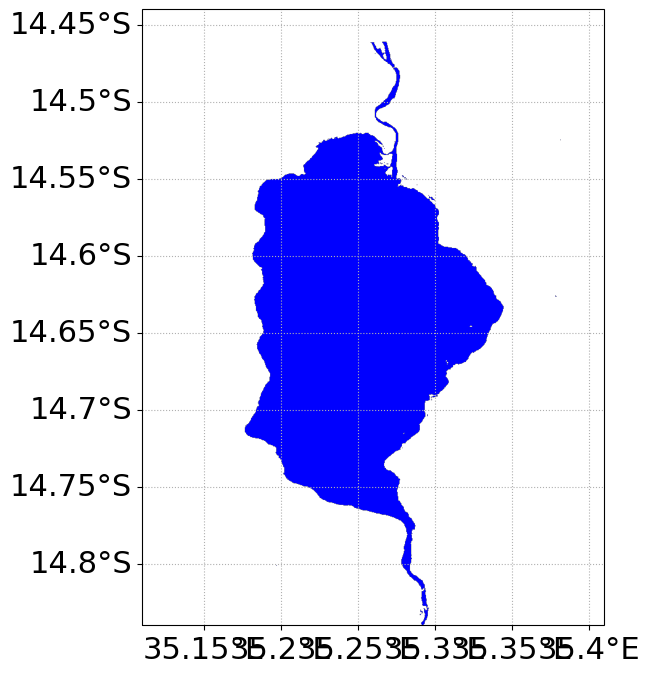

In [28]:
fig = plt.figure(figsize=(10, 8))

withWater = addWater_S2(Sen2ImageCollection, startDate, endDate, bounds)
withWater = withWater.divide(10000)
# print(withWater.select('water'))
waterVisParams = {
  'min': 0,
  'max': 1,
  'palette': ['Blue']
};

# use cartoee to get a map
ax = cartoee.get_map(withWater.select('water'), region=region, vis_params=waterVisParams)
cartoee.add_gridlines(ax, interval=[0.05, 0.05], linestyle=":")
plt.show()

In [29]:
S2_BANDS_2 = ['B12', 'B11', 'B8', 'B3', 'B4', 'B5', 'B2', 'QA60', 'water']
S2_NAMES_2 = ['swir1', 'swir2', 'nir', 'green', 'red', 'red2', 'blue', 'QA60', 'water']

updatedMaskedImage = withWater.select(S2_BANDS_2, S2_NAMES_2)

In [30]:
ChlaVisParam={
    'min':0,
    'max':20,
    'palette':['152E13', '183815', '1A4216', '1C4D17', '1E5817', '206416', '237015', '257D14', '278A12', '29980F', '2BA60C', '2EB509', '31C405', '34D400', '71DD22', 'A5E544', 'D0EC66']
};

In [31]:
equation = '9.547+104.809*((RED2-RED1)/(RED2+RED1))+431.976*((RED2-RED1)/(RED2+RED1))**2'

In [32]:
Chla = updatedMaskedImage.expression(equation,
    {'RED2':updatedMaskedImage.select('red2'),'RED1':updatedMaskedImage.select('red')})

In [33]:
mask = withWater.select('water').gt(0);
LakeWaterMask = updatedMaskedImage.updateMask(mask)
ChlaMask = Chla.updateMask(mask);

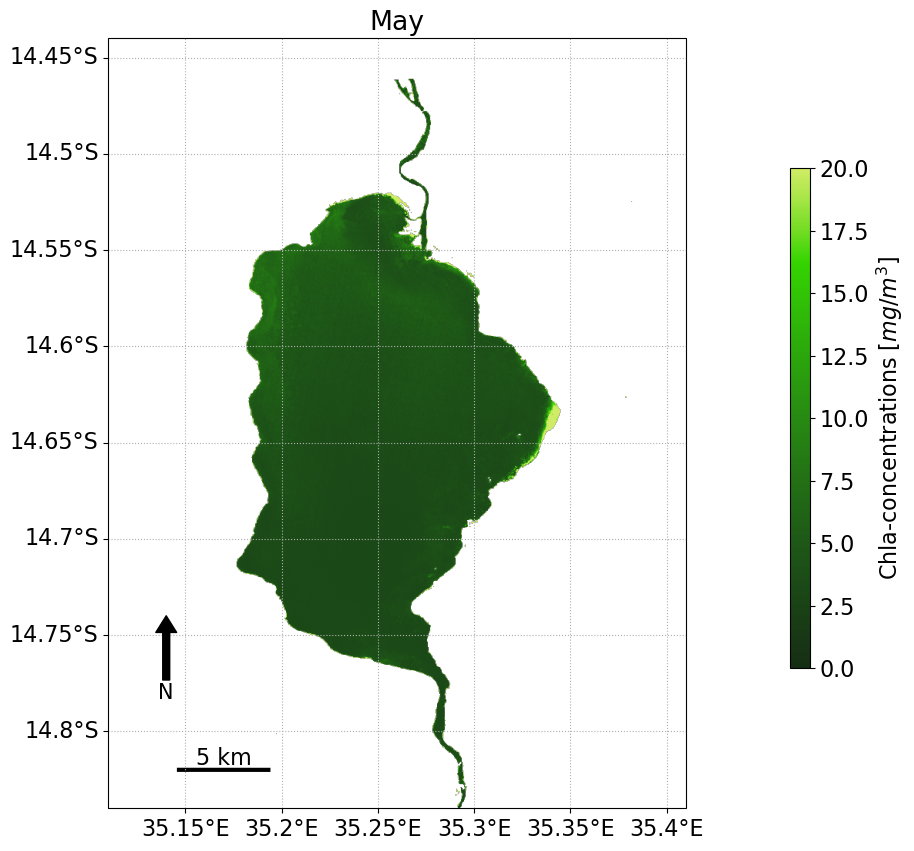

In [34]:
plt.rcParams.update({'font.size': 16})


fig = plt.figure(figsize=(10, 10))
ax = cartoee.get_map(ChlaMask, region=region, vis_params=ChlaVisParam)
ax.set_title('May')

cartoee.add_gridlines(ax, interval=[0.05, 0.05], linestyle=":")

cartoee.add_colorbar(
    ax, ChlaVisParam, loc="right", label="Chla-concentrations [$mg/m^3$]", orientation="vertical"
)

# add the gridlines and specify that the xtick labels be rotated 45 degrees
# cartoee.add_gridlines(ax, interval=0.5, xtick_rotation=0, linestyle=":")

# add north arrow
cartoee.add_north_arrow(
    ax, text="N", xy=(0.1, 0.25), text_color="black", arrow_color="black", fontsize=15
)

# add scale bar
cartoee.add_scale_bar_lite(
    ax, length=5, xy=(0.2, 0.05), fontsize=16, color="black", unit="km"
)

## Figure 4

In [35]:
startDate = '2019-01-01'
endDate = '2019-12-30'

west = ee.Geometry.Point([35.204209, -14.667607])
outlet = ee.Geometry.Point([35.264812, -14.724981])
middle = ee.Geometry.Point([35.238484, -14.618457])
inlet = ee.Geometry.Point([35.236233, -14.53507])
east = ee.Geometry.Point([35.300301, -14.60977])

In [36]:
Sen2ImageCollection = ee.ImageCollection('COPERNICUS/S2_SR')\
                    .filterBounds(middle)\
                    .filterDate(startDate, endDate)\
                    .filterMetadata('CLOUDY_PIXEL_PERCENTAGE', 'less_than', 20)\
                    .map(cloudMasking_S2_div)

In [37]:
equation = '9.547+104.809*((RED2-RED)/(RED2+RED))+431.976*((RED2-RED)/(RED2+RED))**2'

withChla = Sen2ImageCollection.map(lambda img: addChla_S2(img, equation)).select('Chla')

In [38]:
bounds_inlet = inlet.buffer(300)
bounds_east = east.buffer(300)
bounds_west = west.buffer(300)
bounds_middle = middle.buffer(300)
bounds_outlet = outlet.buffer(300)

In [39]:
chla_df_inlet = dataframe_prod(withChla, bounds_inlet, 'Chla')
chla_df_east = dataframe_prod(withChla, bounds_east, 'Chla')
chla_df_west = dataframe_prod(withChla, bounds_west, 'Chla')
chla_df_middle = dataframe_prod(withChla, bounds_middle, 'Chla')
chla_df_outlet = dataframe_prod(withChla, bounds_outlet, 'Chla')

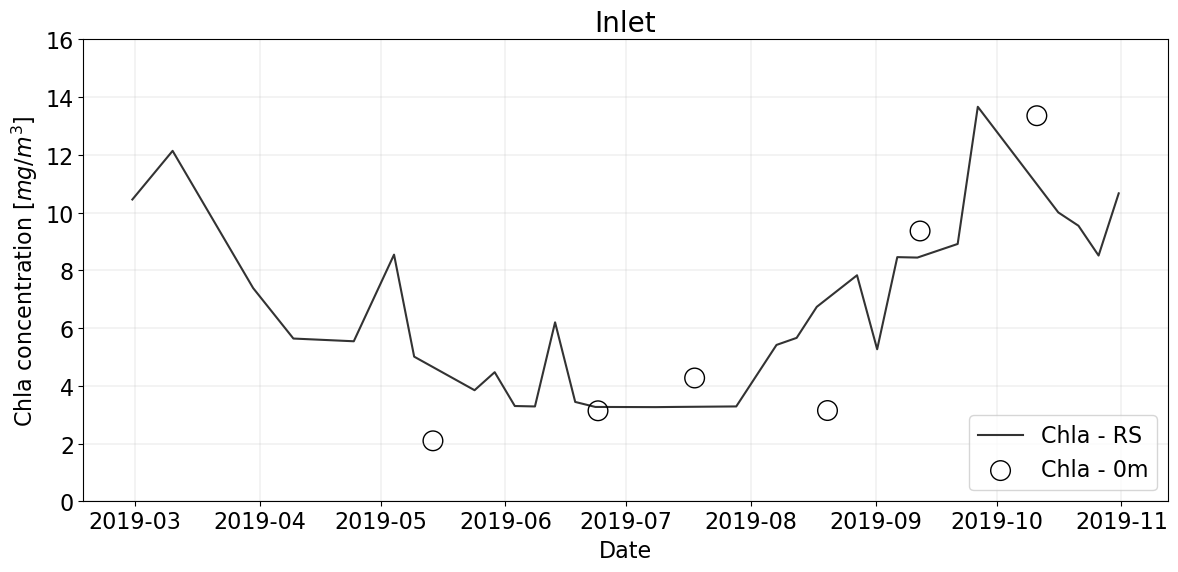

In [40]:
fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(chla_df_inlet['datetime'], chla_df_inlet['Chla'],
           'k-', alpha=0.8, label='Chla - RS')
inlet_dic = {
    'datetime': ['2019-05-14', '2019-06-24', '2019-07-18', '2019-08-20', '2019-09-12', '2019-10-11'],
    'Chla': [2.0985, 3.1390, 4.2744, 3.1478, 9.3652, 13.3576]
}
inlet_df = pd.DataFrame(inlet_dic)
inlet_df['datetime'] = pd.to_datetime(inlet_df['datetime'])

ax.scatter(inlet_df['datetime'], inlet_df['Chla'], c='None', edgecolors='k', s=200, label='Chla - 0m')

ax.set_title('Inlet', fontsize=20)
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('Chla concentration [$mg/m^3$]', fontsize=16)
ax.set_ylim(-0, 16)
ax.grid(lw=0.2)
ax.tick_params(which='both', labelsize=16, pad=3)
ax.legend(fontsize=16, loc='lower right');

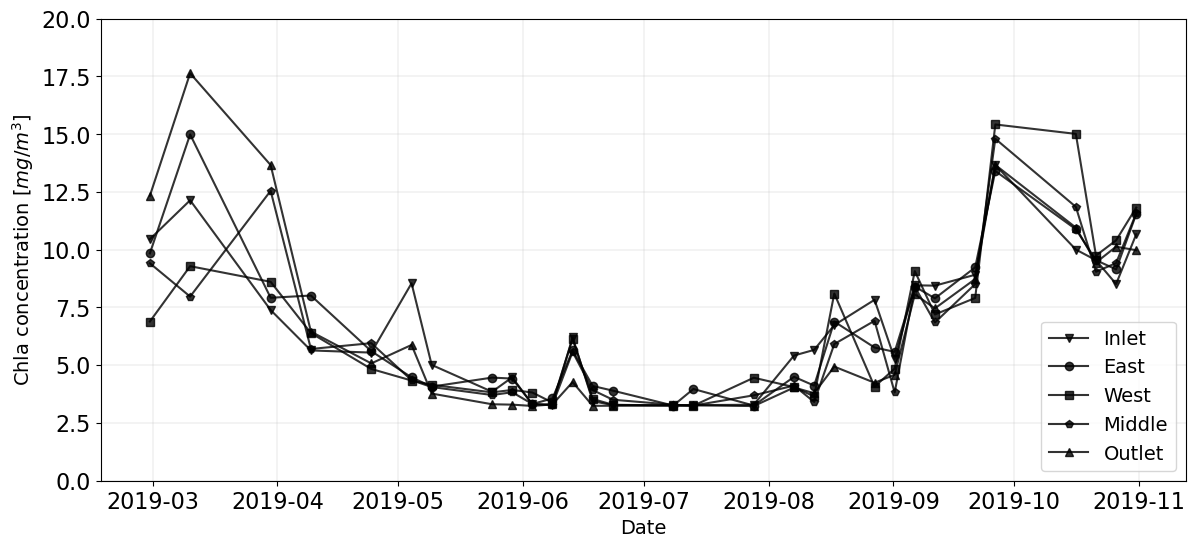

In [41]:
fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(chla_df_inlet['datetime'], chla_df_inlet['Chla'],
           'kv-', alpha=0.8, label='Inlet')
ax.plot(chla_df_east['datetime'], chla_df_east['Chla'],
           'ko-', alpha=0.8, label='East')
ax.plot(chla_df_west['datetime'], chla_df_west['Chla'],
        'ks-', alpha=0.8, label='West')
ax.plot(chla_df_middle['datetime'], chla_df_middle['Chla'],
           'kp-', alpha=0.8, label='Middle')
ax.plot(chla_df_outlet['datetime'], chla_df_outlet['Chla'],
           'k^-', alpha=0.8, label='Outlet')

ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Chla concentration [$mg/m^3$]', fontsize=14)
ax.set_ylim(-0, 20)
ax.grid(lw=0.2)
ax.legend(fontsize=14, loc='lower right');

In [42]:
chla_df_total = np.hstack((chla_df_inlet['Chla'].to_numpy(),\
                            chla_df_east['Chla'].to_numpy(),\
                            chla_df_west['Chla'].to_numpy(),\
                            chla_df_middle['Chla'].to_numpy(),\
                            chla_df_outlet['Chla'].to_numpy()                              
                            ))

chla_df_total = chla_df_total.reshape(5,-1)
chla_df_total_mean = chla_df_total.mean(axis=0)

In [43]:
chla_df_inlet.head()

Chla                datetime  Year  Month  Day  DOY
0  10.455823 2019-02-28 08:04:03.091  2019      2   28   59
1  12.140868 2019-03-10 08:04:02.000  2019      3   10   69
2   7.388744 2019-03-30 08:04:07.000  2019      3   30   89
3   5.640652 2019-04-09 08:04:09.000  2019      4    9   99
4   5.546177 2019-04-24 08:04:14.000  2019      4   24  114

In [44]:
plt.rcParams.update({'font.size': 16})

_, axs = plt.subplots(3, 2, figsize=(16, 9), constrained_layout=True, sharey=True, sharex=True, dpi=600)
axs = axs.flatten()
for i in range(6):
    ax = axs[i]
    
    if i == 0:
        ax.plot(chla_df_inlet['datetime'], chla_df_inlet['Chla'],
               'k-', alpha=0.8, label='Chla - RS')
        inlet_dic = {
            'datetime': ['2019-05-14', '2019-06-24', '2019-07-18', '2019-08-20', '2019-09-12', '2019-10-11'],
            'Chla': [2.0985, 3.1390, 4.2744, 3.1478, 9.3652, 13.3576]
        }
        inlet_df = pd.DataFrame(inlet_dic)
        inlet_df['datetime'] = pd.to_datetime(inlet_df['datetime'])

        ax.scatter(inlet_df['datetime'], inlet_df['Chla'], c='None', edgecolors='k', s=100, label='Chla - 0m')
        ax.set_title('Inlet')
        ax.set_ylabel('Chla concentration \n [$mg/m^3$]')
    elif i == 1:
        ax.plot(chla_df_east['datetime'], chla_df_east['Chla'],
           'k-', alpha=0.8, label='Chla - RS')

        east_dic = {
            'datetime': ['2019-05-14', '2019-06-24', '2019-07-18', '2019-08-20', '2019-09-12', '2019-10-11'],
            'Chla': [3.2866, 2.6231, 2.1347, 8.7450, 7.5128, 6.7654]
        }
        east_df = pd.DataFrame(east_dic)
        east_df['datetime'] = pd.to_datetime(east_df['datetime'])

        ax.scatter(east_df['datetime'], east_df['Chla'], c='None', edgecolors='k', s=100, label='Chla - 0m')
        ax.set_title('East')
    elif i == 2:
        ax.plot(chla_df_middle['datetime'], chla_df_middle['Chla'],
           'k-', alpha=0.8, label='Chla - RS')

        middle_dic = {
            'datetime': ['2019-05-14', '2019-06-24', '2019-07-18', '2019-08-20', '2019-09-12', '2019-10-11'],
            'Chla': [2.0985, 3.7401, 3.4762, 8.9199, 5.2463, 4.5621]
        }
        middle_df = pd.DataFrame(middle_dic)
        middle_df['datetime'] = pd.to_datetime(middle_df['datetime'])

        ax.scatter(middle_df['datetime'], middle_df['Chla'], c='None', edgecolors='k', s=100, label='Chla - 0m')
        ax.set_title('Middle')
        ax.set_ylabel('Chla concentration \n [$mg/m^3$]')
    elif i == 3:
        ax.plot(chla_df_west['datetime'], chla_df_west['Chla'],
           'k-', alpha=0.8, label='Chla - RS')

        west_dic = {
            'datetime': ['2019-05-14', '2019-06-24', '2019-07-18', '2019-08-20', '2019-09-12', '2019-10-11'],
            'Chla': [3.9182, 3.1128, 3.2195, 11.1313, 13.3576, 12.2135]
        }
        west_df = pd.DataFrame(west_dic)
        west_df['datetime'] = pd.to_datetime(west_df['datetime'])

        ax.scatter(west_df['datetime'], west_df['Chla'], c='None', edgecolors='k', s=100, label='Chla - 0m')

        # Add some parameters.
        ax.set_title('West')
    elif i == 4:
        ax.plot(chla_df_outlet['datetime'], chla_df_outlet['Chla'],
           'k-', alpha=0.8, label='Chla - RS')
        outlet_dic = {
            'datetime': ['2019-05-14', '2019-06-24', '2019-07-18', '2019-08-20', '2019-09-12', '2019-10-11'],
            'Chla': [3.6110, 4.5416, 4.6712, 6.2017, 6.5588, 9.4616,]
        }
        outlet_df = pd.DataFrame(outlet_dic)
        outlet_df['datetime'] = pd.to_datetime(outlet_df['datetime'])

        ax.scatter(outlet_df['datetime'], outlet_df['Chla'], c='None', edgecolors='k', s=100, label='Chla - 0m')

        # Add some parameters.
        ax.set_title('Outlet')
        ax.set_xlabel('Date', fontsize=12)
        ax.set_ylabel('Chla concentration \n [$mg/m^3$]')
    elif i == 5:
        ax.plot(chla_df_inlet['datetime'], chla_df_inlet['Chla'],
                   'k-', alpha=0.8, label='Inlet')
        ax.plot(chla_df_east['datetime'], chla_df_east['Chla'],
                   'k--', alpha=0.8, label='East')
        ax.plot(chla_df_west['datetime'], chla_df_west['Chla'],
                'k-.', alpha=0.8, label='West')
        ax.plot(chla_df_middle['datetime'], chla_df_middle['Chla'],
                   'k:', alpha=0.8, label='Middle')
        ax.plot(chla_df_outlet['datetime'], chla_df_outlet['Chla'],
                   'k--.', alpha=0.8, label='Outlet')
        ax.set_xlabel('Date', fontsize=12)


    ax.set_ylim(-0, 20)
    ax.grid(lw=0.2)
    ax.legend(loc='lower right', fontsize=11)
    ax.tick_params(axis='both', labelsize=12)
    

# plt.savefig('./figure4.png')

# Table 4

In [45]:
matrix1 = np.vstack((chla_df_middle['Chla'][:], chla_df_inlet['Chla'][:], chla_df_east['Chla'][:],chla_df_outlet['Chla'][:], chla_df_west['Chla'][:]))
r, p = corrcoef_loop(matrix1)
np.round(r,3), np.round(p,5)

(array([[1.   , 0.858, 0.858, 0.855, 0.919],
        [0.858, 1.   , 0.923, 0.875, 0.84 ],
        [0.858, 0.923, 1.   , 0.93 , 0.88 ],
        [0.855, 0.875, 0.93 , 1.   , 0.798],
        [0.919, 0.84 , 0.88 , 0.798, 1.   ]]),
 array([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]]))

## Figure 5

In [46]:
def double_logistic(x, max_value, amp, slope1, SOS, slope2, EOS):
    return max_value + amp*(1/(1+np.exp(slope1*(x-SOS))) + 1/(1+np.exp(-slope2*(x-EOS)))-1)


x = chla_df_inlet['DOY']
y = chla_df_total_mean

In [47]:
dlModel = Model(double_logistic)
result = dlModel.fit(y, x=x, max_value=11, amp=8, slope1=0.05, SOS=100, slope2=0.05, EOS=270)

print(result.fit_report())

[[Model]]
    Model(double_logistic)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 171
    # data points      = 30
    # variables        = 6
    chi-square         = 41.2884929
    reduced chi-square = 1.72035387
    Akaike info crit   = 21.5815937
    Bayesian info crit = 29.9887780
    R-squared          = 0.85959269
[[Variables]]
    max_value:  11.0412295 +/- 0.55780363 (5.05%) (init = 11)
    amp:        6.99590253 +/- 0.71349476 (10.20%) (init = 8)
    slope1:     0.12732603 +/- 0.07658800 (60.15%) (init = 0.05)
    SOS:        98.3035510 +/- 4.93325755 (5.02%) (init = 100)
    slope2:     0.13249710 +/- 0.06163164 (46.52%) (init = 0.05)
    EOS:        249.784776 +/- 3.64987179 (1.46%) (init = 270)
[[Correlations]] (unreported correlations are < 0.100)
    C(max_value, amp)    = 0.848
    C(amp, slope2)       = -0.472
    C(max_value, EOS)    = 0.428
    C(amp, slope1)       = -0.400
    C(max_value, slope2) = -0.386
    C(max_value, SOS)    = -0.

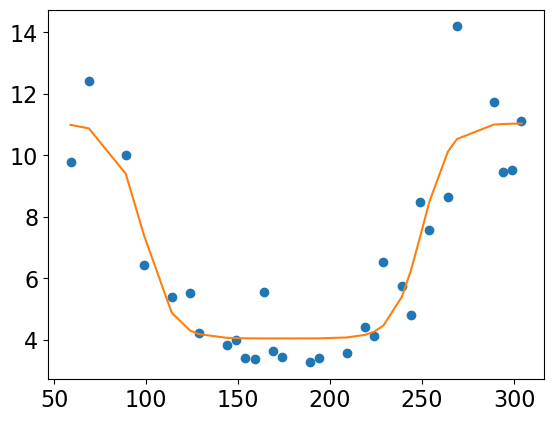

In [48]:
plt.plot(x, y, 'o')
plt.plot(x, result.best_fit, '-', label='best fit');

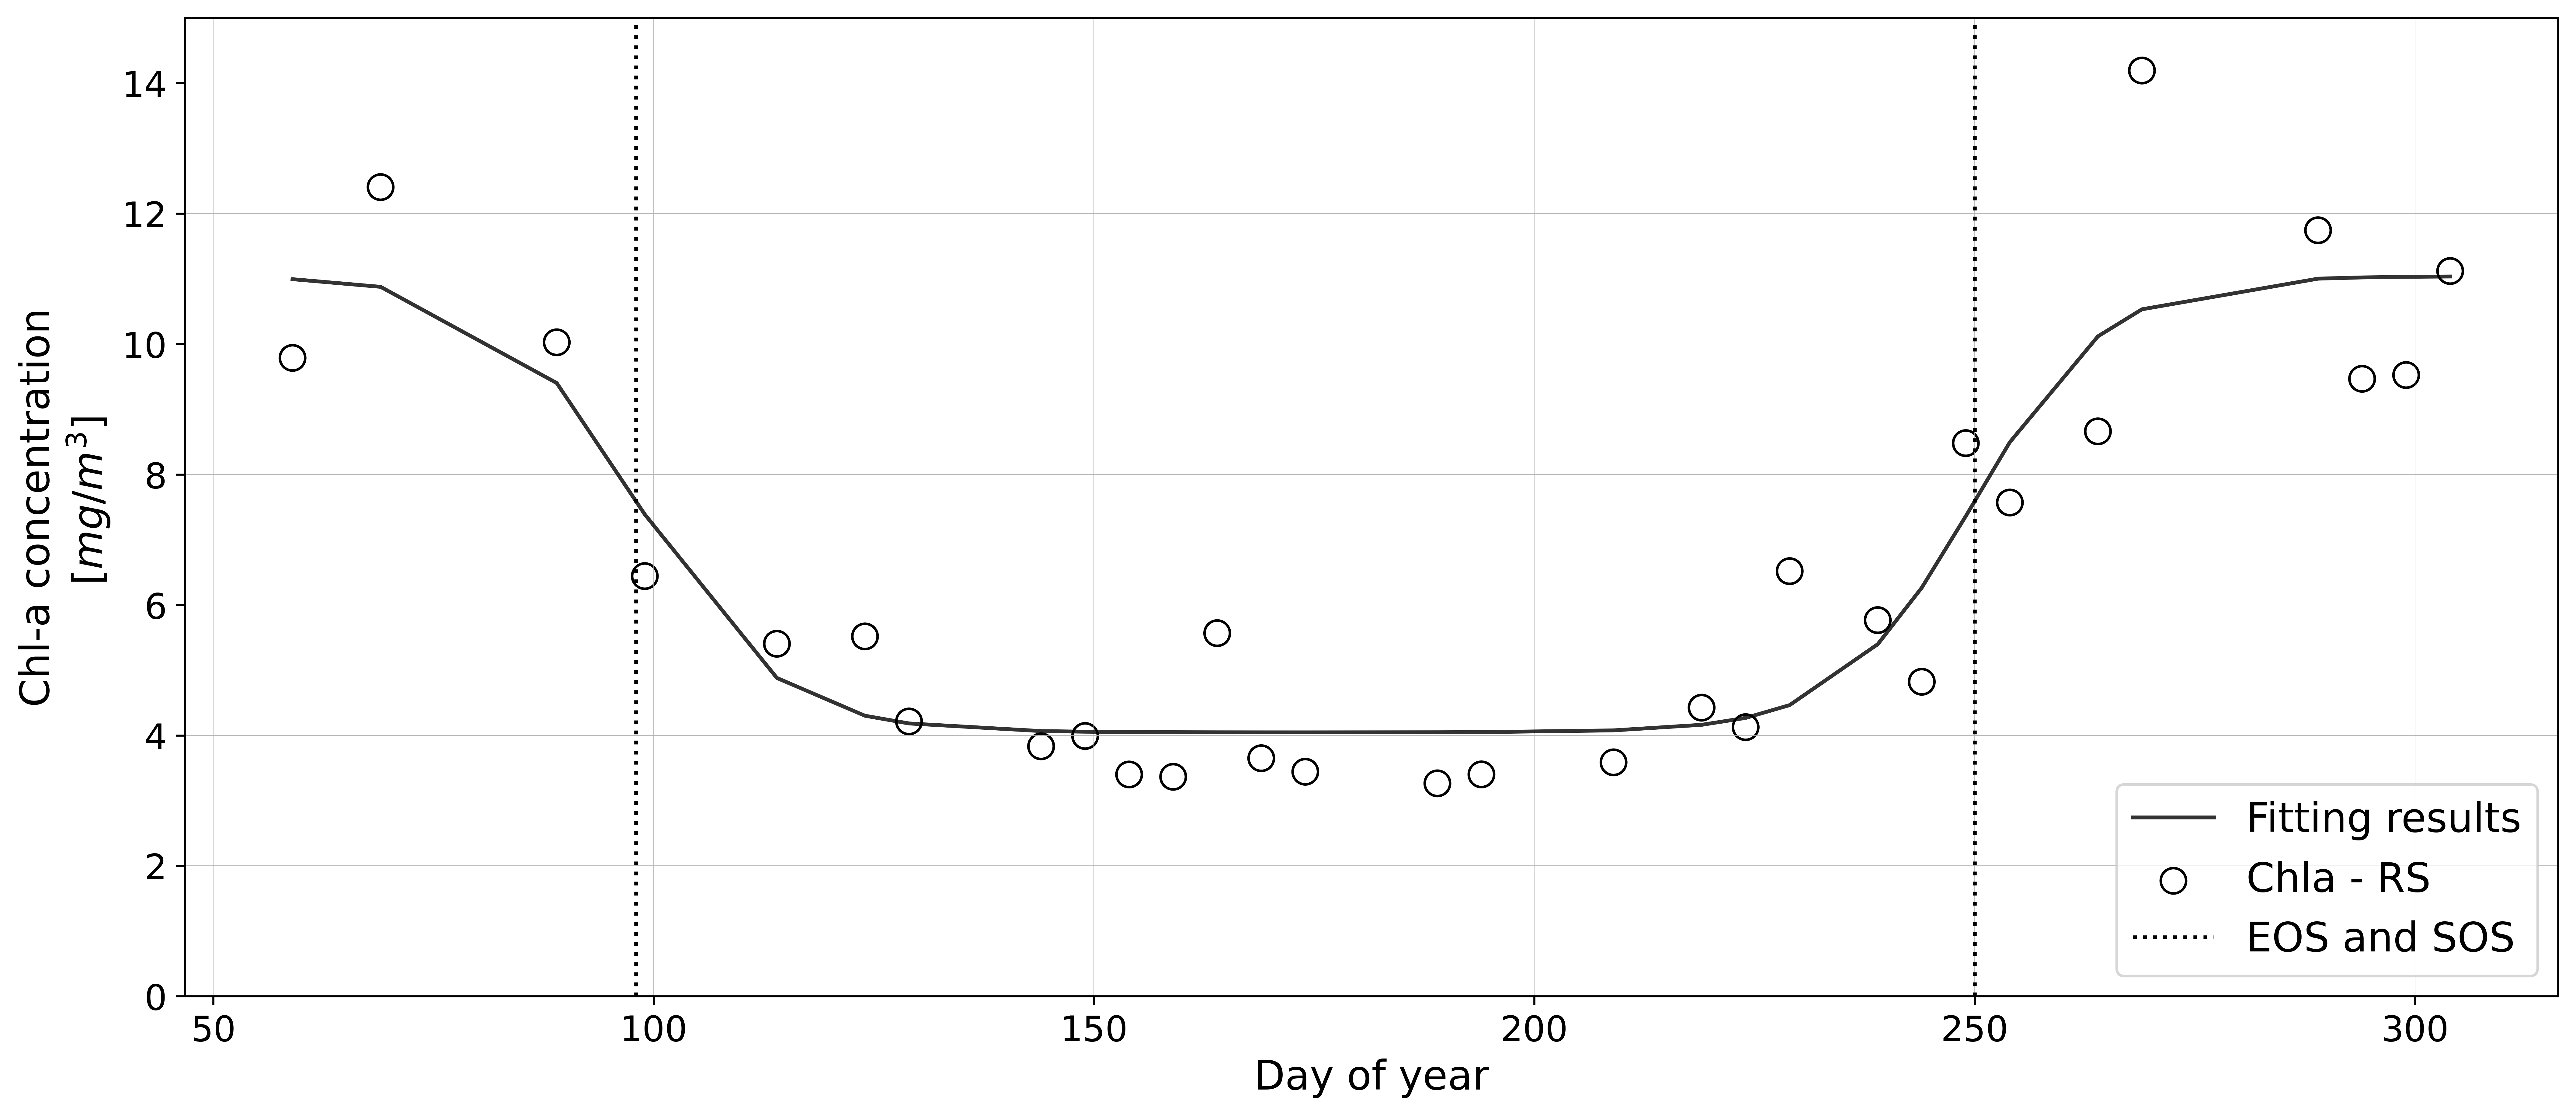

In [49]:
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(14, 6),constrained_layout=True, dpi=600)
ax.plot(x, result.best_fit,
           'k-', alpha=0.8, label='Fitting results')
ax.scatter(x, y, c='None', edgecolors='k', s=100, label='Chla - RS')

# Add some parameters.
# ax.set_title('Outlet', fontsize=16)
ax.set_xlabel('Day of year')
ax.set_ylabel('Chl-a concentration\n [$mg/m^3$]')
ax.set_ylim(-0, 15)
ax.grid(lw=0.2)
ax.axvline(98, c='k', ls=':')
ax.axvline(250, c='k', ls=':')
ax.legend(['Fitting results','Chla - RS', 'EOS and SOS'], loc='lower right')
ax.tick_params(axis='both', labelsize=14);

In [50]:
lake_malombe = ee.Geometry.Point([35.257449031658375,-14.642465147834072])

GSMaP = ee.ImageCollection('JAXA/GPM_L3/GSMaP/v6/operational')\
        .filterBounds(lake_malombe)\
        .filterDate(startDate, endDate)\
        .select('hourlyPrecipRate')

In [51]:
precipi_df_malombe = precipi_dataframe_prod(GSMaP, lake_malombe)
precipi_df_malombe.head()

hourlyPrecipRate            datetime        date  Year  Month  Day  DOY
0          0.000000 2019-01-01 00:00:00  2019-01-01  2019      1    1    1
1          0.000000 2019-01-01 01:00:00  2019-01-01  2019      1    1    1
2          0.000000 2019-01-01 02:00:00  2019-01-01  2019      1    1    1
3          0.000000 2019-01-01 03:00:00  2019-01-01  2019      1    1    1
4          0.011832 2019-01-01 04:00:00  2019-01-01  2019      1    1    1

In [52]:
precipi_df_malombe_sub = precipi_df_malombe[['DOY', 'hourlyPrecipRate']]
precipi_df_malombe_sub = precipi_df_malombe_sub.groupby('DOY').agg('sum')
precipi_df_malombe_sub['Precip-mm/day'] = precipi_df_malombe_sub['hourlyPrecipRate']
precipi_df_malombe_sub = precipi_df_malombe_sub.groupby('DOY').agg('sum').reset_index()

precipi_df_malombe_sub['Precip-mm/day'] = precipi_df_malombe_sub['hourlyPrecipRate']

precipi_df_malombe_sub[['DOY', 'Precip-mm/day']].head()

DOY  Precip-mm/day
0    1       2.082491
1    2       0.735260
2    3       0.183186
3    4      29.591220
4    5      12.223392

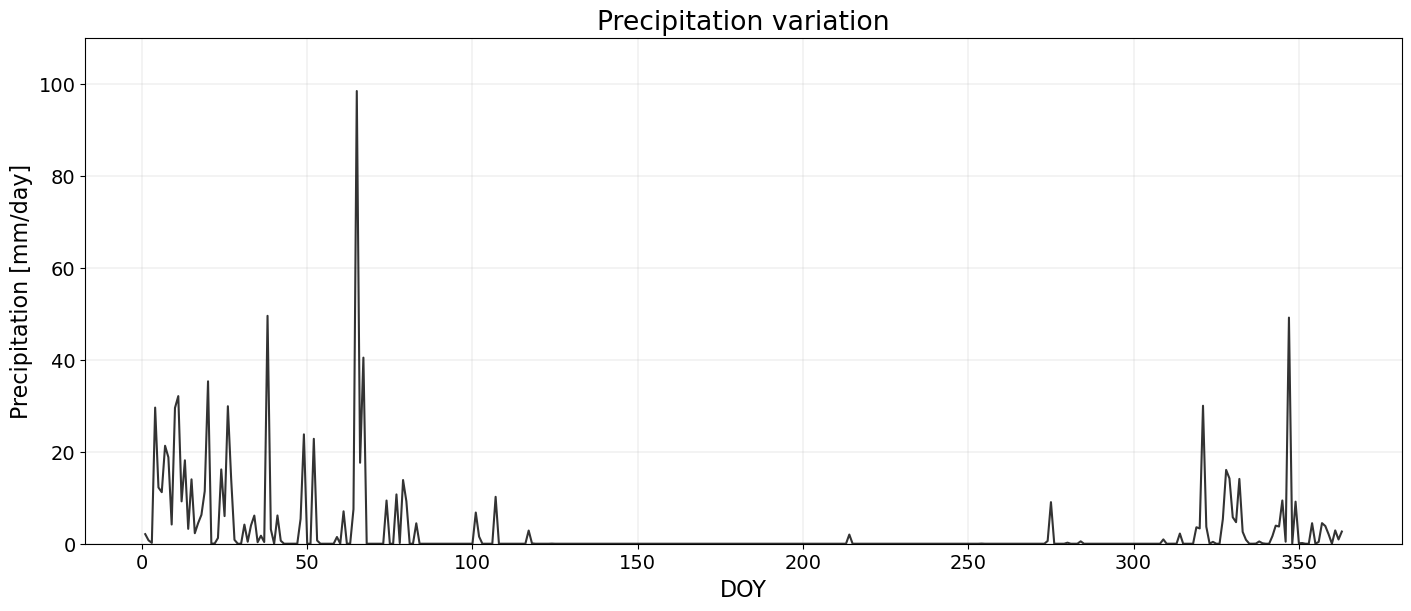

In [53]:
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(14, 6),constrained_layout=True)
doy_series = [i for i in range(1,364)]
ax.plot(doy_series, precipi_df_malombe_sub['Precip-mm/day'],
        c='k',alpha=0.8)

ax.set_title('Precipitation variation')
ax.set_xlabel('DOY')
ax.set_ylabel('Precipitation [mm/day]')
ax.set_ylim(-0, 110)
ax.grid(lw=0.2)
ax.tick_params(axis='both', labelsize=14);

In [54]:
lake_malombe_land = ee.Geometry.Point([35.16317613350976,-14.643399266725753])
lake_malombe = ee.Geometry.Point([35.257449031658375,-14.642465147834072])

modis = ee.ImageCollection('MODIS/061/MOD11A2')\
        .filterBounds(lake_malombe)\
        .filterDate(startDate, endDate)\
        .select('LST_Day_1km')


modLSTc = modis.map(Temp_correction);
temp_df_malombe = dataframe_prod_temp(modLSTc, lake_malombe)
temp_df_malombe_land = dataframe_prod_temp(modLSTc, lake_malombe_land)

add_date_info(temp_df_malombe)
add_date_info(temp_df_malombe_land)
temp_df_malombe.head(10)

LST_Day_1km   datetime  Year  Month  Day  DOY
0        26.59 2019-01-01  2019      1    1    1
1        22.07 2019-01-25  2019      1   25   25
2        23.67 2019-02-02  2019      2    2   33
3        24.99 2019-02-10  2019      2   10   41
4        26.39 2019-02-18  2019      2   18   49
5        26.39 2019-02-26  2019      2   26   57
6        25.09 2019-03-06  2019      3    6   65
7        24.09 2019-03-14  2019      3   14   73
8        24.31 2019-03-22  2019      3   22   81
9        24.57 2019-03-30  2019      3   30   89

In [55]:
plt.rcParams.update({'font.size': 16})

_, axs = plt.subplots(4, 1, figsize=(20, 10), constrained_layout=True, sharex=True, dpi=600)
axs = axs.flatten()
for i in range(4):
    ax = axs[i]
    
    if i == 0:
        ax.plot(x, result.best_fit,
           'k-', alpha=0.8, label='Fitting results')
        ax.scatter(x, y, c='None', edgecolors='k', s=100, label='Chla - RS')
        ax.set_ylabel('Chl-a\n concentration\n [$mg/m^3$]')
        ax.set_ylim(-0, 15)
        ax.axvline(98, c='k', ls=':')
        ax.axvline(250, c='k', ls=':')
        ax.legend(['Fitting results','Chla - RS', 'EOS and SOS'], loc='lower right')
        
    elif i == 1:
        ax.plot(temp_df_malombe['DOY'], temp_df_malombe['LST_Day_1km'],
           c='k', alpha=0.8)
        ax.set_ylabel('Water\n temperature\n [$^\circ C$]')
        ax.set_ylim(18, 30)
        ax.axvline(98, c='k', ls=':')
        ax.axvline(250, c='k', ls=':')
    elif i == 2:
        ax.plot(temp_df_malombe_land['DOY'], temp_df_malombe_land['LST_Day_1km'],
           c='k', alpha=0.8)
        ax.set_ylabel('Land\n temperature\n [$^\circ C$]')
        ax.set_ylim(20, 50)
        ax.axvline(98, c='k', ls=':')
        ax.axvline(250, c='k', ls=':')
    elif i == 3:
        ax.plot(precipi_df_malombe_sub['DOY'], precipi_df_malombe_sub['Precip-mm/day'],
        c='k',alpha=0.8)

        ax.set_xlabel('Day of year')
        ax.set_ylabel('Precipitation\n [mm/day]')
        ax.set_ylim(-0, 100)
        ax.axvline(98, c='k', ls=':')
        ax.axvline(250, c='k', ls=':')
    
    ax.grid(lw=0.2)
    ax.tick_params(axis='both')
    

# plt.savefig('./figure5-revised.png')